In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
df.isna().sum()/len(df)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [8]:
df.duplicated().any()

False

In [9]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
df['dr_recc_h1n1_vacc'].describe()

count    24547.000000
mean         0.220312
std          0.414466
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dr_recc_h1n1_vacc, dtype: float64

In [11]:
df['dr_recc_h1n1_vacc'].mean()

0.2203120544262028

In [12]:
df['dr_recc_h1n1_vacc'].value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [13]:
df['dr_recc_h1n1_vacc']=df['dr_recc_h1n1_vacc'].fillna(0)

In [14]:
df.isna().sum()/len(df)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             0.000000
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [15]:
df['dr_recc_seasonal_vacc'].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [16]:
df['dr_recc_seasonal_vacc']=df['dr_recc_seasonal_vacc'].fillna(0)

In [17]:
df.isna().sum()/len(df)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             0.000000
dr_recc_seasonal_vacc         0.000000
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [18]:
df['has_health_insur'].value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [19]:
df['has_health_insur']=df['has_health_insur'].fillna(1)

In [20]:
df.isna().sum()/len(df)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             0.000000
dr_recc_seasonal_vacc         0.000000
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur              0.000000
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [21]:
df['income_level'].mode()

0    <= $75,000, Above Poverty
Name: income_level, dtype: object

In [22]:
df['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [23]:
df['income_level']=df['income_level'].fillna(df['income_level'].mode()[0])

In [24]:
df.isna().sum()/len(df)*100

unique_id                    0.000000
h1n1_worry                   0.344479
h1n1_awareness               0.434343
antiviral_medication         0.265848
contact_avoidance            0.778822
bought_face_mask             0.071142
wash_hands_frequently        0.157262
avoid_large_gatherings       0.325757
reduced_outside_home_cont    0.307036
avoid_touch_face             0.479275
dr_recc_h1n1_vacc            0.000000
dr_recc_seasonal_vacc        0.000000
chronic_medic_condition      3.635751
cont_child_undr_6_mnths      3.070356
is_health_worker             3.010447
has_health_insur             0.000000
is_h1n1_vacc_effective       1.464036
is_h1n1_risky                1.452803
sick_from_h1n1_vacc          1.479013
is_seas_vacc_effective       1.729884
is_seas_risky                1.924589
sick_from_seas_vacc          2.010709
age_bracket                  0.000000
qualification                5.268282
race                         0.000000
sex                          0.000000
income_level

In [25]:
df.dropna(inplace=True)

In [26]:
df.isna().sum()/len(df)*100

unique_id                    0.0
h1n1_worry                   0.0
h1n1_awareness               0.0
antiviral_medication         0.0
contact_avoidance            0.0
bought_face_mask             0.0
wash_hands_frequently        0.0
avoid_large_gatherings       0.0
reduced_outside_home_cont    0.0
avoid_touch_face             0.0
dr_recc_h1n1_vacc            0.0
dr_recc_seasonal_vacc        0.0
chronic_medic_condition      0.0
cont_child_undr_6_mnths      0.0
is_health_worker             0.0
has_health_insur             0.0
is_h1n1_vacc_effective       0.0
is_h1n1_risky                0.0
sick_from_h1n1_vacc          0.0
is_seas_vacc_effective       0.0
is_seas_risky                0.0
sick_from_seas_vacc          0.0
age_bracket                  0.0
qualification                0.0
race                         0.0
sex                          0.0
income_level                 0.0
marital_status               0.0
housing_status               0.0
employment                   0.0
census_msa

In [27]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [28]:
df.drop('unique_id',inplace=True,axis=1)

In [29]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [30]:
cat_col=df.select_dtypes(include='O')
cat_col#.columns

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26700,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City"
26701,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City"
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"


In [31]:
df['age_bracket'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [32]:
df['age_bracket'].mode()

0    65+ Years
Name: age_bracket, dtype: object

In [33]:
df['age_bracket'].value_counts()

65+ Years        5840
55 - 64 Years    5000
45 - 54 Years    4666
18 - 34 Years    4574
35 - 44 Years    3346
Name: age_bracket, dtype: int64

In [34]:
df['age_bracket'].mode()

0    65+ Years
Name: age_bracket, dtype: object

In [35]:
import random

In [36]:
def agedif(i):
    if '+' in i:
        i=i.replace('+','')
        i=i.replace('Years','')
        i=int(i)
        i=random.choice(range(i,random.choice(range(85,95))))
        return(i)
    elif '-' in i:
        i=i.replace('Years','')
        i=i.split('-')
        fst=int(i[0])
        sec=int(i[1])
        i=random.choice(range(fst,sec))
        return(i)

In [37]:
df['age_bracket']=df['age_bracket'].map(agedif)

In [38]:
df['age_bracket'].mean()

52.0882779817297

In [39]:
df['age_bracket'].median()

52.0

<AxesSubplot:xlabel='age_bracket'>

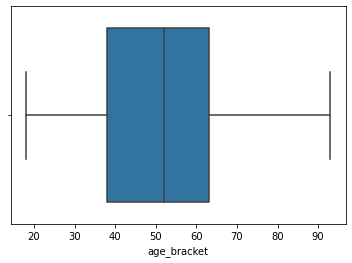

In [40]:
sns.boxplot(df['age_bracket'])

In [41]:
df['age_bracket'].value_counts()

56    611
60    582
62    568
55    553
58    553
     ... 
89    104
90     85
91     71
92     45
93     24
Name: age_bracket, Length: 72, dtype: int64

In [42]:
df['age_bracket'].dtypes

dtype('int64')

In [43]:
cat_col=df.select_dtypes(include='O')
cat_col.columns

Index(['qualification', 'race', 'sex', 'income_level', 'marital_status',
       'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [44]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [45]:
def qualified(i):
    if '< 12 Years' in i:
        i='Attended School'
        return(i)
    elif '12 Years' in i:
        i='HSC'
        return(i)
    elif 'College Graduate' in i:
        i='Graduate'
        return(i)
    else:
        return(i)

In [46]:
df['qualification']=df['qualification'].map(qualified)

In [47]:
df['qualification']

0        Attended School
1                    HSC
2               Graduate
3                    HSC
4           Some College
              ...       
26700                HSC
26701           Graduate
26702       Some College
26703           Graduate
26706       Some College
Name: qualification, Length: 23426, dtype: object

In [48]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [49]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [50]:
df['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [51]:
def pov(i):
    if '> $75,000' in i:
        i=i.replace('> $75,000','Wealthy')
        return(i)
    elif '<= $75,000' in i:
        i=i.replace('<= $75,000, Above Poverty','Middle Class')
        return(i)
    else:
        return(i)

In [52]:
df['income_level']=df['income_level'].map(pov)

In [53]:
df['income_level'].unique()

array(['Below Poverty', 'Middle Class', 'Wealthy'], dtype=object)

In [54]:
df['marital_status'].unique()

array(['Not Married', 'Married'], dtype=object)

In [55]:
df['housing_status'].unique()

array(['Own', 'Rent'], dtype=object)

In [56]:
df['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [57]:
df['census_msa'].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [58]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int64
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [59]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,Middle Class,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,Middle Class,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,Wealthy,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,Wealthy,Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,Middle Class,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,Middle Class,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0


In [60]:
cat_col=df.select_dtypes(include='O')
cat_col

,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,Attended School,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,HSC,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,Graduate,White,Male,Middle Class,Not Married,Own,Employed,"MSA, Not Principle City"
3,HSC,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,Some College,White,Female,Middle Class,Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...
26700,HSC,White,Female,Wealthy,Married,Own,Not in Labor Force,"MSA, Principle City"
26701,Graduate,White,Female,Wealthy,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
26702,Some College,White,Female,Middle Class,Not Married,Own,Not in Labor Force,Non-MSA
26703,Graduate,White,Male,Middle Class,Not Married,Rent,Employed,"MSA, Principle City"


In [61]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,Middle Class,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,Middle Class,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,Wealthy,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,Wealthy,Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,Middle Class,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,Middle Class,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()

In [64]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [65]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,0,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,0,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,1,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,0,2,0,0,1,1,1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,0,2,1,1,1,1,3.0,0.0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,0,1,1,0,1,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,1,1,0,1,1.0,0.0,0


In [66]:
df=df.astype('int')

In [67]:
df.dtypes

h1n1_worry                   int32
h1n1_awareness               int32
antiviral_medication         int32
contact_avoidance            int32
bought_face_mask             int32
wash_hands_frequently        int32
avoid_large_gatherings       int32
reduced_outside_home_cont    int32
avoid_touch_face             int32
dr_recc_h1n1_vacc            int32
dr_recc_seasonal_vacc        int32
chronic_medic_condition      int32
cont_child_undr_6_mnths      int32
is_health_worker             int32
has_health_insur             int32
is_h1n1_vacc_effective       int32
is_h1n1_risky                int32
sick_from_h1n1_vacc          int32
is_seas_vacc_effective       int32
is_seas_risky                int32
sick_from_seas_vacc          int32
age_bracket                  int32
qualification                int32
race                         int32
sex                          int32
income_level                 int32
marital_status               int32
housing_status               int32
employment          

In [68]:
X=df.iloc[:,:-1]
X

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1,0,0,0,0,0,0,1,1,0,...,0,3,0,0,1,0,1,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,2,3,1,0,1,1,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,1,3,1,1,1,0,0,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,2,3,0,0,1,1,1,1,0,0
4,2,1,0,1,0,1,1,0,1,0,...,3,3,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3,1,0,1,0,1,0,0,1,1,...,2,3,0,2,0,0,1,1,1,0
26701,2,2,0,0,0,1,0,0,1,0,...,1,3,0,2,1,1,1,1,3,0
26702,2,0,0,1,0,0,0,1,0,0,...,3,3,0,1,1,0,1,2,0,0
26703,1,2,0,1,0,1,0,0,0,1,...,1,3,1,1,1,1,0,1,1,0


In [69]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
26700    0
26701    0
26702    0
26703    0
26706    0
Name: h1n1_vaccine, Length: 23426, dtype: int32

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [72]:
X_train.shape

(18740, 32)

In [73]:
X_test.shape

(4686, 32)

In [74]:
y_train.shape

(18740,)

In [75]:
y_test.shape

(4686,)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [78]:
X_train

array([[-1.80645997, -0.48186083, -0.22368822, ...,  1.41641668,
        -1.19595884, -0.57201508],
       [ 0.4231353 , -0.48186083, -0.22368822, ...,  0.20443327,
         0.13905835,  0.51472079],
       [ 1.53793294, -0.48186083, -0.22368822, ..., -1.00755013,
         1.47407555,  0.51472079],
       ...,
       [-0.69166233, -0.48186083, -0.22368822, ...,  1.41641668,
         0.13905835, -0.57201508],
       [-0.69166233, -0.48186083, -0.22368822, ..., -1.00755013,
         0.13905835, -0.57201508],
       [ 0.4231353 , -0.48186083,  4.47050806, ..., -1.00755013,
         0.13905835,  1.60145666]])

In [79]:
X_test

array([[-1.80645997, -0.48186083, -0.22368822, ..., -1.00755013,
        -1.19595884, -0.57201508],
       [-1.80645997, -0.48186083, -0.22368822, ...,  1.41641668,
         0.13905835, -0.57201508],
       [ 1.53793294,  1.17230146, -0.22368822, ...,  1.41641668,
         1.47407555, -0.57201508],
       ...,
       [-0.69166233,  1.17230146, -0.22368822, ...,  0.20443327,
         0.13905835, -0.57201508],
       [ 0.4231353 , -0.48186083, -0.22368822, ...,  0.20443327,
        -1.19595884, -0.57201508],
       [-0.69166233, -0.48186083, -0.22368822, ...,  1.41641668,
         2.80909274, -0.57201508]])

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [83]:
print('Train Data')
print(confusion_matrix(y_train,y_pred_train))
print('Test Data')
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[13925   780]
 [ 2285  1750]]
Test Data
[[3471  213]
 [ 541  461]]


In [84]:
print('Train Data')
print(accuracy_score(y_train,y_pred_train))
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Train Data
0.8364461045891142
Test Data
0.8390951771233461


In [85]:
y_train_proba=reg.predict_proba(X_train)
y_train_proba

array([[0.92799439, 0.07200561],
       [0.98874537, 0.01125463],
       [0.9562111 , 0.0437889 ],
       ...,
       [0.81942356, 0.18057644],
       [0.98886343, 0.01113657],
       [0.76942278, 0.23057722]])

In [86]:
y_test_proba=reg.predict_proba(X_test)[:,1]
y_test_proba

array([0.03942329, 0.29447391, 0.0823221 , ..., 0.0613751 , 0.16513505,
       0.73368956])

In [87]:
from sklearn.metrics import classification_report

In [88]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14705
           1       0.69      0.43      0.53      4035

    accuracy                           0.84     18740
   macro avg       0.78      0.69      0.72     18740
weighted avg       0.82      0.84      0.82     18740

Test Data
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3684
           1       0.68      0.46      0.55      1002

    accuracy                           0.84      4686
   macro avg       0.77      0.70      0.73      4686
weighted avg       0.83      0.84      0.83      4686



In [89]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1,0,0,0,0,0,0,1,1,0,...,3,0,0,1,0,1,2,0,0,0
1,3,2,0,1,0,1,0,1,1,0,...,3,1,0,1,1,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,3,1,1,1,0,0,0,2,0,0
3,1,1,0,1,0,1,1,0,0,0,...,3,0,0,1,1,1,1,0,0,0
4,2,1,0,1,0,1,1,0,1,0,...,3,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3,1,0,1,0,1,0,0,1,1,...,3,0,2,0,0,1,1,1,0,0
26701,2,2,0,0,0,1,0,0,1,0,...,3,0,2,1,1,1,1,3,0,0
26702,2,0,0,1,0,0,0,1,0,0,...,3,0,1,1,0,1,2,0,0,0
26703,1,2,0,1,0,1,0,0,0,1,...,3,1,1,1,1,0,1,1,0,0


In [90]:
X=df.iloc[:,:-1]
X

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1,0,0,0,0,0,0,1,1,0,...,0,3,0,0,1,0,1,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,2,3,1,0,1,1,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,1,3,1,1,1,0,0,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,2,3,0,0,1,1,1,1,0,0
4,2,1,0,1,0,1,1,0,1,0,...,3,3,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3,1,0,1,0,1,0,0,1,1,...,2,3,0,2,0,0,1,1,1,0
26701,2,2,0,0,0,1,0,0,1,0,...,1,3,0,2,1,1,1,1,3,0
26702,2,0,0,1,0,0,0,1,0,0,...,3,3,0,1,1,0,1,2,0,0
26703,1,2,0,1,0,1,0,0,0,1,...,1,3,1,1,1,1,0,1,1,0


In [91]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
26700    0
26701    0
26702    0
26703    0
26706    0
Name: h1n1_vaccine, Length: 23426, dtype: int32

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn=KNeighborsClassifier()

In [112]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [113]:
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)


In [114]:
print('Train Data')
print(confusion_matrix(y_train,y_pred_train))
print('Test Data')
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[14156   549]
 [ 2283  1752]]
Test Data
[[3429  255]
 [ 695  307]]


In [115]:
from sklearn.metrics import classification_report

In [116]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     14705
           1       0.76      0.43      0.55      4035

    accuracy                           0.85     18740
   macro avg       0.81      0.70      0.73     18740
weighted avg       0.84      0.85      0.83     18740

Test Data
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3684
           1       0.55      0.31      0.39      1002

    accuracy                           0.80      4686
   macro avg       0.69      0.62      0.64      4686
weighted avg       0.77      0.80      0.77      4686



In [122]:
param={'n_neighbors':list(range(1,31)),
            'weights' : ['uniform', 'distance'],
           'metric':['minkowski','euclidean','manhattan']}

In [123]:
param

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
gridclf=GridSearchCV(knn,param_grid=param,scoring='f1',cv=5,n_jobs=-1)

In [ ]:
gridclf.fit(X_train,y_train)

In [ ]:
grid_train_pred=gridclf.predict(X_train)
grid_test_pred=gridclf.predict(X_test)

In [ ]:
print('Train Data')
print(classification_report(y_train,grid_train_pred))
print('Test Data')
print(classification_report(y_test,grid_test_pred))